# SWILE

* Swile provided you with some data about sales before the marketing campaign. 
* Our goal will be to check whether this marketing campaign was a genius idea or a huge failure so that the company could replicate it abroad.
* This dataset describes the number of calls on the same day in France and abroad. 
* **The only difference** between these two samples is the impact of Marketing campaign.
* Test whether **the average number of calls in France is actually higher** than the ones abroad.

## Step 1 - Import libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

## Step 2 - Import Dataset

In [53]:
df = pd.read_csv("./assets/Python/swile_sales_calls.csv")
df.head()

,calls_abroad,calls_in_France
0,4,6
1,4,2
2,4,9
3,9,9
4,2,9


## Step 3 - EDA

Appels           : 5.50
Appels en France : 5.79


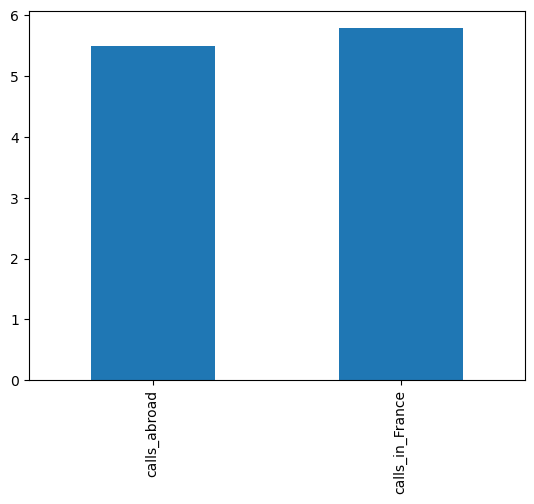

In [54]:
print(f"Appels           : {df.calls_abroad.mean():.2f}")
print(f"Appels en France : {df.calls_in_France.mean():.2f}")

Means = df.mean()
_ = Means.plot(kind="bar")

## Step 4 - Define hypothesises

In [55]:
H1 = "La moyenne du nb d'appels en France est supérieure à celle des autres pays"
H0 = "La moyenne du nb d'appels en France est inférieure à celle des autres pays"

## Step 5 - Calculate Z-score

In [56]:
MoyAbroad = df.calls_abroad.mean()
MoyFR = df.calls_in_France.mean()
s = df.calls_in_France.std()
n = len(df)
Z_Score = (MoyFR - MoyAbroad) / (s / (n**0.5))
Z_Score

1.1664524375772458

## Step 6 - Set $\alpha$

In [57]:
alpha = 0.1

# Step 7 - Compare p-value to $\alpha$ 

In [63]:
# Z! df["calls_in_France"] les valeurs de l'échantillons
z_score, p_value = ztest(df["calls_in_France"], value=MoyAbroad, alternative="larger")
print("z_score  = ", z_score)
print("p_value  = ", p_value)

sample_average = df.mean()["calls_in_France"]
sample_std = df.std()["calls_in_France"]
mu = df.mean()["calls_abroad"]
n = len(df)
z_score = (sample_average - mu) / (sample_std / np.sqrt(n))
print("z_score  = ", z_score)

# Pour le fun...
X = norm(df["calls_in_France"].mean(), (df["calls_in_France"].std() / (len(df)) ** 0.5))
# cdf => Cumulative Distribution Function
p_value = X.cdf(df["calls_abroad"].mean())
print("p_value = ", p_value)


if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée")
    print(f"Pour rappel H0 = {H0}")

z_score  =  1.1664524375772454
p_value  =  0.12171578397679123
z_score  =  1.1664524375772458
p_value = 0.12171578397679111
H0 ne peut pas être rejetée
Pour rappel H0 = La moyenne du nb d'appels en France est inférieure à celle des autres pays


# Spendesk 
* Spendesk really would like to prove is that their platform save at least 26 days of work to their customers

## Step 1 - Import libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

## Step 2 - Import Dataset

In [31]:
df = pd.read_csv("./assets/Python/spendesk_survey.csv")
df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after
0,11,75
1,13,72
2,38,15
3,28,34
4,39,17


## Step 3 - EDA

65.73
41.03


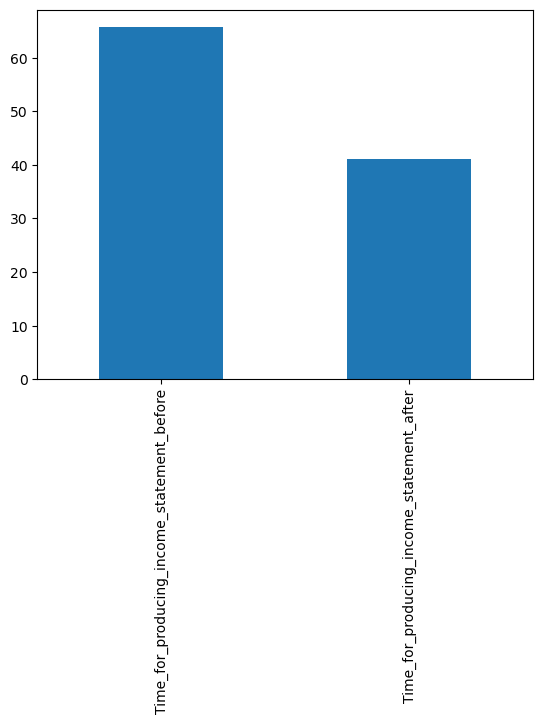

In [32]:
MeanBefore = df.Time_for_producing_income_statement_before.mean()
MeanAfter = df.Time_for_producing_income_statement_after.mean()

print(f"{MeanBefore:.2f}")
print(f"{MeanAfter:.2f}")

Means = df.mean()
_ = Means.plot(kind="bar")

In [33]:
boost = (MeanBefore - MeanAfter) / MeanBefore
boost

0.3758430783898091

In [34]:
df["time_diff"] = ( df["Time_for_producing_income_statement_before"] - df["Time_for_producing_income_statement_after"])
df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after,time_diff
0,11,75,-64
1,13,72,-59
2,38,15,23
3,28,34,-6
4,39,17,22


## Step 4 - Define hypothesises

In [35]:
H1 = "the platform saves at least 26 days of work"
H0 = "the platform save less than 26 days of work"

In [36]:
sample_mean = df.time_diff.mean()
sample_std = df.time_diff.std()
n = len(df)
z_score = (sample_mean - 26) / (sample_std / n**0.5)
z_score

-1.321211217800986

In [37]:
alpha = 10 / 100

## Step 5 - Calculate p_value

In [38]:
# Z! df["calls_in_France"] les valeurs de l'échantillons
z_score, p_value = ztest(df.time_diff, value=26, alternative="smaller")
print(f"z_score  = {z_score:.02f}")
print(f"p_value  = {p_value:.02f}")


# Pour le fun...
# X est une distribution normale de moyenne = 26 et sigma = s/sqrt(n)
X = norm(26, (df.time_diff.std() / len(df) ** 0.5))
# cdf => Cumulative Distribution Function 
p_value2 = X.cdf(df.time_diff.mean())  
print(f"p_value  = {p_value2:.02f}")


if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée")
    print(f"Pour rappel H0 = {H0}")

z_score  = -1.32
p_value  = 0.09
p_value  = 0.09
HO est rejetée donc H1 est acceptée
Pour rappel H1 = the platform saves at least 26 days of work


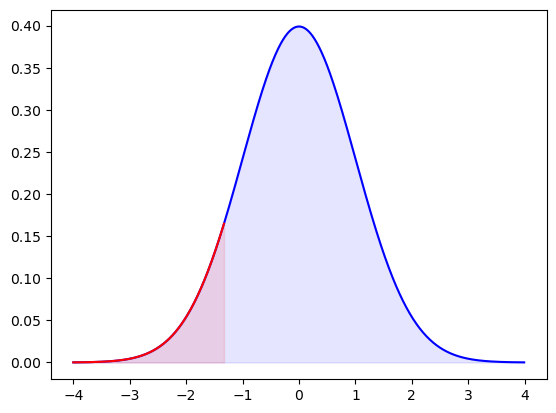

In [39]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

# Vinted
They asked you to run an A/B test to determine which version would provide **more conversions**.

## Step 1 - Import Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Import dataset

In [41]:
df = pd.read_csv("./assets/Python/vinted_website_optimization.csv")
df.head()

,Feature_A,Feature_B
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


## Step 3 - EDA
Let's first see the proportion of conversion for Feature A as well as Feature B


In [42]:
convert_A = df.Feature_A.sum()
convert_A = convert_A/len(df)
print(f"Taux de conversion A : {convert_A}")
print(f"Taux de conversion A : {df.Feature_A.mean()}\n")        # préférable aux 3 lignes précédentes

print(f"Taux de conversion B : {df.Feature_B.mean()}")       

Taux de conversion A : 0.086
Taux de conversion A : 0.086

Taux de conversion B : 0.126


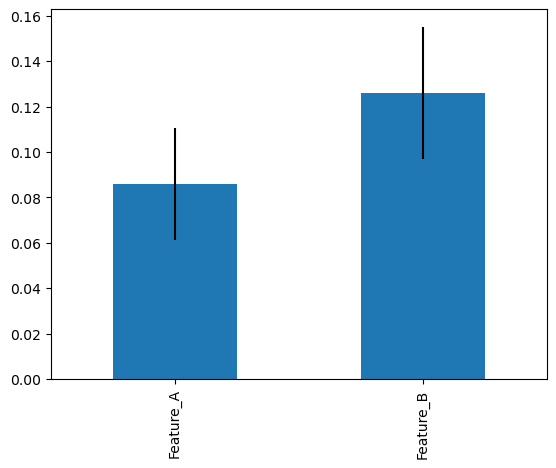

In [43]:
# Construction de l'intervale de confiance
# ©️ Asma 😊
# Le cahier des charge dit intervalle de confiance 95%, donc t = 1.96
t = 1.96
n = len(df)
err = t * df.std() / n**0.5

# Pour yerr voir https://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#visualization-errorbars
_ = df.mean().plot(kind="bar", yerr=err)

## Step 3.5 - Define hypothesis

In [44]:
# Les hypothèses sous forme de chaines pour les utiliser en fin de programme
H1 = "The conversions rate are differents"
H0 = "The conversions rate are equal"

## Step 4 - Test - Z_score

In [45]:
muA = df.Feature_A.mean()
muB = df.Feature_B.mean()

sigmaA = df.Feature_A.std()
sigmaB = df.Feature_B.std()

n = len(df)

denom = sigmaB**2/n + sigmaA**2/n
denom = denom**.5
z_score = (muB - muA)/denom
print(f"z_score  = {z_score:.03f}\n")

z_score  = 2.057



## Step 5 - Set $\alpha$

Confidence level = 95%

In [46]:
alpha = .05

## Step 6 - Compare p-value to $\alpha$

Voir : https://www.statology.org/z-test-python/

In [47]:
# Bien voir le signe de z_score et la valeur de p_value
# On veut tester si A est significativement plus petit que B
z_score, p_value = ztest(df.Feature_A, df.Feature_B, value = 0, alternative="smaller")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

# Bien voir le signe de z_score et la valeur de p_value
# On veut tester si B est significativement plus grand que A
z_score, p_value = ztest(df.Feature_B, df.Feature_A, value = 0, alternative="larger")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée")
    print(f"Pour rappel H0 = {H0}")


z_score  = -2.0568
p_value  = 0.0199

z_score  = 2.0568
p_value  = 0.0199

HO est rejetée donc H1 est acceptée
Pour rappel H1 = The conversions rate are differents


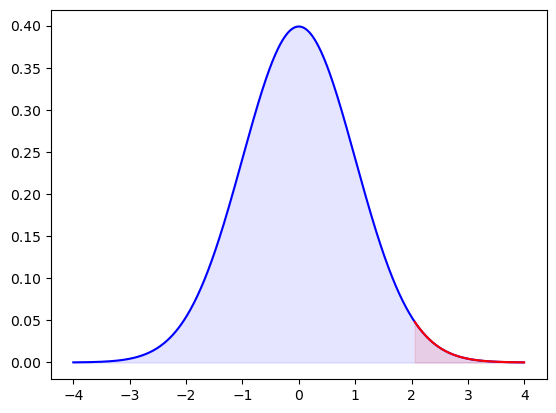

In [48]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)